<a href="https://colab.research.google.com/github/String-ru/AIFFEL_quest_cr/blob/main/MainQuest/Quest03/MainQuest03_Lung_Cancer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#폐암 진단기 개선하기

0217 류지호

#개요

첫째, data를 가져오고 CNN 모델링을 진행한다.

둘째, data imbalance 문제를 해결하고, model을 훈련하고 결과를 살펴볼 것이다.

셋째, 모델의 성능을 높이기 위해 batch size와 epoch수에 변화를 주거나,

augmentation 기법을 통해 원본 data에 대한 전처리 및 배치 구성을 진행한 뒤 결과를 비교할 것이다.

마지막으로, ResNet의 가장 작은 버전인 ResNet-18를 구현하여 학습시킨다.

##아쉬운 점

data증강기법과 ResNet구현에 대한 코드를 다 완성하여

아이펠 LMS에서 1회성으로 성공했으나,

결과를 다 캡쳐해놓지 못한 채 커널 연결이 끊겨서 결과를 남기지 못했다.

이후 코랩에서 코드를 수정하여 지속적으로 실행을 시도했으나,

반복되는 error와 너무나도 긴 학습 시간 등의 이슈로 마무리를 짓지 못했다.

또한 1차 학습 및 테스트에 대하여

약 0.8의 정확도가 나왔던 LMS에서의 학습결과와 다르게,

코랩에서는 약 0.37 정도의 매우 낮은 학습결과가 나와서,

열심히 비교 분석했으나 결국 차이점을 찾지 못하고 끝났다.

이 부분이 해결되어야 그 이후의 테스트들이 진행 가능해지며,

비교를 통한 회고 작성도 가능했기에 일단 여기에서 MainQuest03 시도는 매우 아쉽게 마무리했다.

## 해결하지 못한 부분

1. 동일한 코드와 data로 진행했다고 여겼던 학습/검증/테스트 과정에서

LMS에서는 0.8, 코랩에서는 0.4 정도의 정확도가 나온 원인 파악 및 수정 (원인을 파악하지 못한 상황)

2. batch 및 epoch 조절 결과 도출 및 성능 비교 (코드는 작성했으나 실행을 못 했음)

3. augmentation기법 사용 (코드는 작성했으나 실행을 못 했음)

4. ResNet 구현 (코드는 작성했으나 실행을 못 했음)

#목차

1. Set up

2. data 가져오기

3. data 시각화

4. CNN 모델링

5. data imbalance 처리

6. model 훈련

7. 결과 확인

8. Batch size, Epoch 변경해보기

9. augmentation기법 사용하기

10. ResNet-18 구현 (Step4)

11. 데이터 imbalance 처리 (Step5)

12. 모델 훈련 (Step6)

13. 결과 확인과 시각화 (Step7)

14. summary 및 회고

#1. Set up

# Kaggle API 설치

pip install kaggle 명령어를 사용하여 Kaggle API를 설치 (Kaggle을 Colab에서 활용할 수 있게 됨)

In [ ]:
pip install kaggle #Kaggle API 클라이언트를 설치(Kaggle 활용 가능해짐)

# Google Drive 마운트

drive.mount('/content/drive') 사용하여 Google Drive를 Colab 환경에 연결

In [ ]:
from google.colab import drive
drive.mount('/content/drive') #Google Colab 환경에서 Google Drive를 마운트(연결)

Mounted at /content/drive


#2. data 가져오기

# data set 다운로드

!kaggle datasets download -d paultimothymooney/chest-xray-pneumonia 사용하여

Kaggle API를 통해 "chest-xray-pneumonia" data set 다운로드

(출력 결과: 데이터셋의 URL, 라이선스 및 다운로드 진행 상황 등의 정보)

In [ ]:
!kaggle datasets download -d paultimothymooney/chest-xray-pneumonia
#Kaggle API를 사용하여 "chest-xray-pneumonia" 데이터셋을 다운로드

Dataset URL: https://www.kaggle.com/datasets/paultimothymooney/chest-xray-pneumonia
License(s): other
 99% 2.28G/2.29G [00:12<00:00, 259MB/s]
100% 2.29G/2.29G [00:13<00:00, 189MB/s]


In [ ]:
# Google Drive 마운트
from google.colab import drive
drive.mount('/content/drive')

# Kaggle API 설치
!pip install kaggle

# Kaggle 데이터 다운로드
!kaggle datasets download -d paultimothymooney/chest-xray-pneumonia -p /content/

# Colab 환경에서 zip 파일 압축 해제
import os

zip_file_path = "/content/lung_cancer.zip"  # Kaggle에서 받은 zip 파일 경로
extract_folder_path = "/content/lung_cancer"  # 압축 해제할 폴더

!unzip -q "/content/{zip_file_path}" -d "{extract_folder_path}"

# rsync를 사용하여 안정적으로 Google Drive로 파일 이동
!rsync -av "/content/lung_cancer/" "/content/drive/MyDrive/lung_cancer/"

print("파일 이동 완료! Google Drive에서 확인하세요.")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Dataset URL: https://www.kaggle.com/datasets/paultimothymooney/chest-xray-pneumonia
License(s): other
chest-xray-pneumonia.zip: Skipping, found more recently modified local copy (use --force to force download)
unzip:  cannot find or open /content//content/lung_cancer.zip, /content//content/lung_cancer.zip.zip or /content//content/lung_cancer.zip.ZIP.
sending incremental file list
rsync: [sender] change_dir "/content/lung_cancer" failed: No such file or directory (2)

sent 19 bytes  received 12 bytes  62.00 bytes/sec
total size is 0  speedup is 0.00
rsync error: some files/attrs were not transferred (see previous errors) (code 23) at main.c(1338) [sender=3.2.7]
파일 이동 완료! Google Drive에서 확인하세요.


In [ ]:
!mkdir -p ~/.kaggle  # ~/.kaggle 폴더 생성
!cp "/content/drive/MyDrive/cats_and_dogs_extracted/kaggle.json" ~/.kaggle/  # 올바른 경로에서 복사
!chmod 600 ~/.kaggle/kaggle.json  # 권한 설정
#Kaggle API token 파일인 kaggle.json을 Kaggle API와 통신할 수 있도록 적절한 디렉터리로 이동

In [ ]:
!kaggle datasets list

ref                                                                   title                                              size  lastUpdated          downloadCount  voteCount  usabilityRating  
--------------------------------------------------------------------  ------------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
asinow/car-price-dataset                                              Car Price Dataset                                 135KB  2025-01-26 19:53:28          19493        312  1.0              
abdulmalik1518/mobiles-dataset-2025                                   Mobiles Dataset (2025)                             20KB  2025-02-18 06:50:24           3480         66  1.0              
mahmoudelhemaly/students-grading-dataset                              Student Performance & Behavior Dataset            508KB  2025-02-17 17:38:46           2997         57  1.0              
himelsarder/coffee-shop-daily-revenue-pr

In [ ]:
!pip install --upgrade kagglehub

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.0/63.0 kB 3.2 MB/s eta 0:00:00
  Attempting uninstall: kagglehub
    Found existing installation: kagglehub 0.3.9
    Uninstalling kagglehub-0.3.9:
      Successfully uninstalled kagglehub-0.3.9


In [ ]:
import kagglehub

# Download latest version
!kaggle datasets download -d paultimothymooney/chest-xray-pneumonia -p /content/

Dataset URL: https://www.kaggle.com/datasets/paultimothymooney/chest-xray-pneumonia
License(s): other
chest-xray-pneumonia.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
!unzip /content/chest-xray-pneumonia.zip -d /content/chest_xray_data

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
  inflating: /content/chest_xray_data/chest_xray/train/NORMAL/IM-0435-0001-0001.jpeg  
  inflating: /content/chest_xray_data/chest_xray/train/NORMAL/IM-0435-0001.jpeg  
  inflating: /content/chest_xray_data/chest_xray/train/NORMAL/IM-0437-0001-0001.jpeg  
  inflating: /content/chest_xray_data/chest_xray/train/NORMAL/IM-0437-0001-0002.jpeg  
  inflating: /content/chest_xray_data/chest_xray/train/NORMAL/IM-0437-0001.jpeg  
  inflating: /content/chest_xray_data/chest_xray/train/NORMAL/IM-0438-0001.jpeg  
  inflating: /content/chest_xray_data/chest_xray/train/NORMAL/IM-0439-0001-0001.jpeg  
  inflating: /content/chest_xray_data/chest_xray/train/NORMAL/IM-0439-0001-0002.jpeg  
  inflating: /content/chest_xray_data/chest_xray/train/NORMAL/IM-0439-0001.jpeg  
  inflating: /content/chest_xray_data/chest_xray/train/NORMAL/IM-0440-0001.jpeg  
  inflating: /content/chest_xray_data/chest_xray/train/NORMAL/IM-0441-0001.jpeg  
  inflating: /content/chest_xray_data

In [ ]:
!ls /content/chest_xray_data

chest_xray


In [ ]:
import os

base_dir = "/content/chest_xray_data/chest_xray"
print(os.listdir(base_dir))

['chest_xray', '__MACOSX', 'train', 'test', 'val']


In [ ]:
for split in ["train", "val", "test"]:
    split_path = os.path.join(base_dir, split)
    print(f"{split} 데이터 개수:")
    for category in os.listdir(split_path):
        category_path = os.path.join(split_path, category)
        print(f"  {category}: {len(os.listdir(category_path))}개")

train 데이터 개수:
  PNEUMONIA: 3875개
  NORMAL: 1341개
val 데이터 개수:
  PNEUMONIA: 8개
  NORMAL: 8개
test 데이터 개수:
  PNEUMONIA: 390개
  NORMAL: 234개


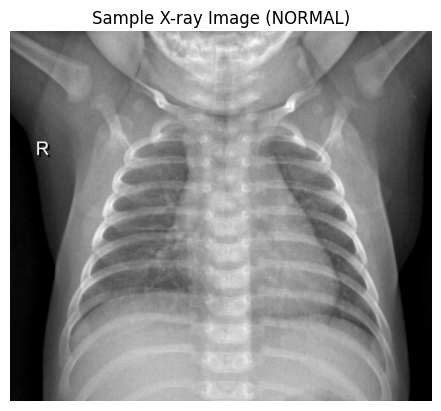

In [ ]:
import matplotlib.pyplot as plt
import cv2

sample_path = os.path.join(base_dir, "train/NORMAL")
sample_image = cv2.imread(os.path.join(sample_path, os.listdir(sample_path)[0]), cv2.IMREAD_GRAYSCALE)

plt.imshow(sample_image, cmap="gray")
plt.title("Sample X-ray Image (NORMAL)")
plt.axis("off")
plt.show()

In [ ]:
ROOT_PATH = "/content/drive/MyDrive/lung_cancer"
TEST_PATH = os.path.join(ROOT_PATH, "chest_xray/test")

In [ ]:
import glob

TEST_PATH = os.path.join(ROOT_PATH, "chest_xray/test/*/*")  # 두 단계 내려가야 함

# 모든 테스트 이미지 파일 경로 가져오기
test_filenames = glob.glob(TEST_PATH)

print(f"✅ 총 {len(test_filenames)}개의 테스트 이미지가 있습니다!")
print(test_filenames[:5])  # 일부만 출력해보기

✅ 총 624개의 테스트 이미지가 있습니다!
['/content/drive/MyDrive/lung_cancer/chest_xray/test/NORMAL/IM-0003-0001.jpeg', '/content/drive/MyDrive/lung_cancer/chest_xray/test/NORMAL/IM-0001-0001.jpeg', '/content/drive/MyDrive/lung_cancer/chest_xray/test/NORMAL/IM-0005-0001.jpeg', '/content/drive/MyDrive/lung_cancer/chest_xray/test/NORMAL/IM-0006-0001.jpeg', '/content/drive/MyDrive/lung_cancer/chest_xray/test/NORMAL/IM-0007-0001.jpeg']


In [ ]:
# 필요한 패키지들 임포트
import os, re
import random, math
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings(action='ignore')

# 데이터 로드할 때 빠르게 로드할 수 있도록하는 설정 변수
AUTOTUNE = tf.data.experimental.AUTOTUNE

# X-RAY 이미지 사이즈 변수
IMAGE_SIZE = [180, 180]

# 데이터 경로 변수
ROOT_PATH = '/content/drive/MyDrive/lung_cancer'  # Google Drive 내 데이터 경로
TRAIN_PATH = os.path.join(ROOT_PATH, 'chest_xray/train/*/*')  # 훈련용 이미지 경로
VAL_PATH = os.path.join(ROOT_PATH, 'chest_xray/val/*/*')  # 검증용 이미지 경로
TEST_PATH = os.path.join(ROOT_PATH, 'chest_xray/test/*/*')  # 테스트용 이미지 경로

# 프로젝트를 진행할 때 아래 두 변수를 변경해보세요
BATCH_SIZE = 16
EPOCHS = 10

print("ROOT_PATH:", ROOT_PATH)

ROOT_PATH: /content/drive/MyDrive/lung_cancer


In [ ]:
# 데이터셋 파일 경로 로드
train_filenames = tf.io.gfile.glob(TRAIN_PATH)
test_filenames = tf.io.gfile.glob(TEST_PATH)
val_filenames = tf.io.gfile.glob(VAL_PATH)

# 데이터셋 파일 개수 출력
print(f"Train filenames count: {len(train_filenames)}")
print(f"Test filenames count: {len(test_filenames)}")
print(f"Val filenames count: {len(val_filenames)}")

Train filenames count: 5216
Test filenames count: 624
Val filenames count: 16


In [ ]:
# 훈련 데이터와 검증 데이터를 filenames에 합친 후, 8:2로 나누기
filenames = tf.io.gfile.glob(TRAIN_PATH)
filenames.extend(tf.io.gfile.glob(VAL_PATH))

# 훈련 데이터 80%, 검증 데이터 20%로 나누기
train_size = math.floor(len(filenames)*0.8)
random.seed(8)
random.shuffle(filenames)
train_filenames = filenames[:train_size]
val_filenames = filenames[train_size:]

# 나눠진 데이터셋 크기 출력
print(f"Train filenames count after split: {len(train_filenames)}")
print(f"Val filenames count after split: {len(val_filenames)}")

Train filenames count after split: 4185
Val filenames count after split: 1047


In [ ]:
# 파일 경로의 끝에서 두 번째 부분을 확인하여 양성과 음성을 구분
def get_label(file_path):
    parts = tf.strings.split(file_path, os.path.sep)
    return parts[-2] == "PNEUMONIA"   # 폐렴이면 양성(True), 노말이면 음성(False)

    # 이미지를 알맞은 형식으로 바꿔주는 함수
def decode_img(img):
    img = tf.image.decode_jpeg(img, channels=3)  # 이미지를 uint8 tensor로 수정
    img = tf.image.convert_image_dtype(img, tf.float32)  # float32 타입으로 변환
    img = tf.image.resize(img, IMAGE_SIZE)  # 이미지 크기 조정
    img = img * 255.0  # 정규화된 값을 0~255로 변환
    img = tf.cast(img, tf.uint8)  # 최종적으로 uint8로 캐스팅
    return img

# 이미지 파일의 경로를 입력하면 이미지와 라벨을 읽어오는 함수
def process_path(file_path):
    label = tf.cond(
        tf.strings.regex_full_match(file_path, '.*PNEUMONIA.*'),  # 'PNEUMONIA'가 포함되어 있으면
        lambda: 1,  # PNEUMONIA -> 1
        lambda: 0   # NORMAL -> 0
    )

    image = tf.io.read_file(file_path)
    image = tf.image.decode_jpeg(image, channels=3)
    image = tf.image.resize(image, IMAGE_SIZE)
    return image, label

In [ ]:
# tf.data.Dataset으로 변환
train_list_ds = tf.data.Dataset.from_tensor_slices(train_filenames)
val_list_ds = tf.data.Dataset.from_tensor_slices(val_filenames)
test_list_ds = tf.data.Dataset.from_tensor_slices(test_filenames)

# 데이터셋의 크기 확인
TRAIN_IMG_COUNT = tf.data.experimental.cardinality(train_list_ds).numpy()
VAL_IMG_COUNT = tf.data.experimental.cardinality(val_list_ds).numpy()
TEST_IMG_COUNT = tf.data.experimental.cardinality(test_list_ds).numpy()

print(f"Training images count: {TRAIN_IMG_COUNT}")
print(f"Validating images count: {VAL_IMG_COUNT}")
print(f"Test images count: {TEST_IMG_COUNT}")

Training images count: 4185
Validating images count: 1047
Test images count: 624


In [ ]:
def prepare_for_training(ds, shuffle_buffer_size=1000):
    ds = ds.shuffle(buffer_size=shuffle_buffer_size)  # 셔플
    ds = ds.repeat()  # 데이터를 반복
    ds = ds.batch(BATCH_SIZE)  # 배치 처리
    ds = ds.prefetch(buffer_size=AUTOTUNE)  # 데이터 미리 로드
    return ds

train_ds = prepare_for_training(train_list_ds.map(process_path, num_parallel_calls=AUTOTUNE))
val_ds = prepare_for_training(val_list_ds.map(process_path, num_parallel_calls=AUTOTUNE))
test_ds = test_list_ds.map(process_path, num_parallel_calls=AUTOTUNE).batch(BATCH_SIZE)

for image, label in train_ds.take(1):  # train_ds에서 첫 번째 배치를 가져옴
    print("Image shape: ", image.numpy().shape)
    print("Label: ", label.numpy())

Image shape:  (16, 180, 180, 3)
Label:  [1 0 1 1 1 0 1 1 1 1 1 1 0 0 1 1]


#3. data 시각화

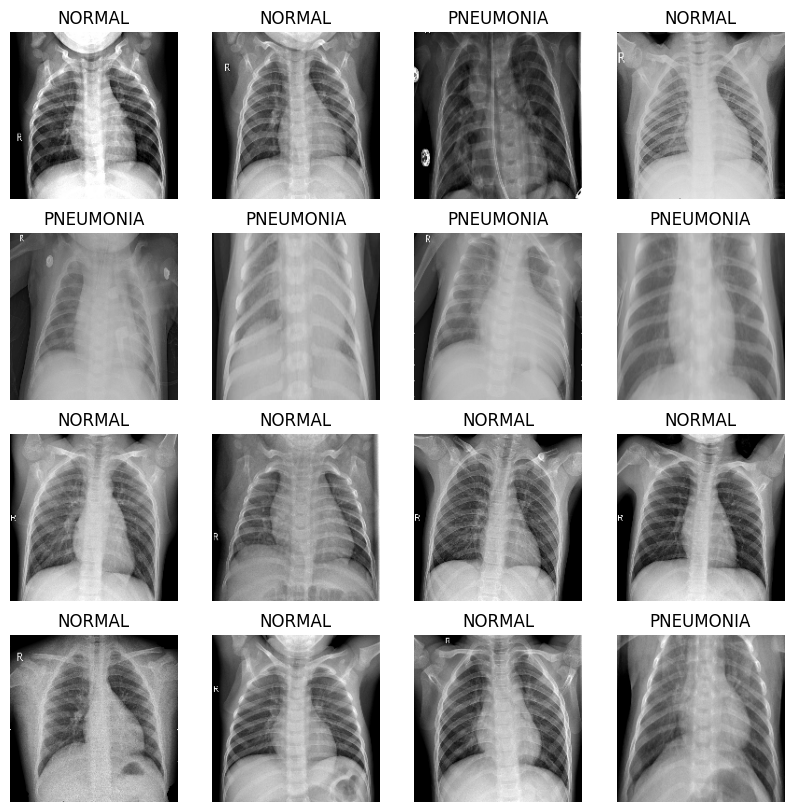

In [ ]:
# 이미지 배치를 입력하면 여러 장의 이미지를 보여줍니다.
def show_batch(image_batch, label_batch):
    plt.figure(figsize=(10,10))
    for n in range(BATCH_SIZE):
        ax = plt.subplot(4, math.ceil(BATCH_SIZE/4), n+1)
        plt.imshow(image_batch[n] / 255.0)  # 이미지 값을 0~1 범위로 정규화
        if label_batch[n]:
            plt.title("PNEUMONIA")
        else:
            plt.title("NORMAL")
        plt.axis("off")

# 이미지 배치와 라벨 배치를 가져와서 시각화
image_batch, label_batch = next(iter(train_ds))
show_batch(image_batch.numpy(), label_batch.numpy())

#4. CNN 모델링

In [ ]:
def conv_block(filters):
    block = tf.keras.Sequential([
        tf.keras.layers.SeparableConv2D(filters, 3, activation='relu', padding='same'),
        tf.keras.layers.SeparableConv2D(filters, 3, activation='relu', padding='same'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.MaxPool2D()
    ])

    return block

In [ ]:
def dense_block(units, dropout_rate):
    block = tf.keras.Sequential([
        tf.keras.layers.Dense(units, activation='relu'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dropout(dropout_rate)
    ])

    return block

In [ ]:
def build_model():
    model = tf.keras.Sequential([
        tf.keras.Input(shape=(IMAGE_SIZE[0], IMAGE_SIZE[1], 3)),

        tf.keras.layers.Conv2D(16, 3, activation='relu', padding='same'),
        tf.keras.layers.Conv2D(16, 3, activation='relu', padding='same'),
        tf.keras.layers.MaxPool2D(),

        conv_block(32),
        conv_block(64),

        conv_block(128),
        tf.keras.layers.Dropout(0.2),

        conv_block(256),
        tf.keras.layers.Dropout(0.2),

        tf.keras.layers.Flatten(),
        dense_block(512, 0.7),
        dense_block(128, 0.5),
        dense_block(64, 0.3),

        tf.keras.layers.Dense(1, activation='sigmoid')
    ])

    return model

#5. 데이터 imbalance 처리

In [ ]:
# 'NORMAL'과 'PNEUMONIA' 클래스의 이미지 개수 계산
COUNT_NORMAL = len([f for f in train_filenames if 'NORMAL' in f])
COUNT_PNEUMONIA = len([f for f in train_filenames if 'PNEUMONIA' in f])

# weight 계산
weight_for_0 = (1 / COUNT_NORMAL)*(TRAIN_IMG_COUNT)/2.0
weight_for_1 = (1 / COUNT_PNEUMONIA)*(TRAIN_IMG_COUNT)/2.0

# class_weight 딕셔너리
class_weight = {0: weight_for_0, 1: weight_for_1}

print('Weight for NORMAL: {:.2f}'.format(weight_for_0))
print('Weight for PNEUMONIA: {:.2f}'.format(weight_for_1))

Weight for NORMAL: 1.95
Weight for PNEUMONIA: 0.67


In [ ]:
with tf.device('/GPU:0'):
    model = build_model()

    METRICS = [
        'accuracy',
        tf.keras.metrics.Precision(name='precision'),
        tf.keras.metrics.Recall(name='recall')
    ]

    model.compile(
        optimizer='adam',
        loss='binary_crossentropy',
        metrics=METRICS
    )

#6. model 훈련

In [ ]:
with tf.device('/GPU:0'):
    history = model.fit(
        train_ds,
        steps_per_epoch=TRAIN_IMG_COUNT // BATCH_SIZE,
        epochs=EPOCHS,
        validation_data=val_ds,
        validation_steps=VAL_IMG_COUNT // BATCH_SIZE,
        class_weight=class_weight,
    )

Epoch 1/10
261/261 ━━━━━━━━━━━━━━━━━━━━ 517s 2s/step - accuracy: 0.7508 - loss: 0.4718 - precision: 0.9317 - recall: 0.7188 - val_accuracy: 0.7337 - val_loss: 0.8501 - val_precision: 0.7337 - val_recall: 1.0000
Epoch 2/10
261/261 ━━━━━━━━━━━━━━━━━━━━ 408s 2s/step - accuracy: 0.9118 - loss: 0.2214 - precision: 0.9754 - recall: 0.9054 - val_accuracy: 0.7365 - val_loss: 1.3325 - val_precision: 0.7365 - val_recall: 1.0000
Epoch 3/10
261/261 ━━━━━━━━━━━━━━━━━━━━ 447s 2s/step - accuracy: 0.9214 - loss: 0.1963 - precision: 0.9744 - recall: 0.9197 - val_accuracy: 0.9058 - val_loss: 0.2720 - val_precision: 0.9970 - val_recall: 0.8745
Epoch 4/10
261/261 ━━━━━━━━━━━━━━━━━━━━ 442s 2s/step - accuracy: 0.9362 - loss: 0.1730 - precision: 0.9801 - recall: 0.9342 - val_accuracy: 0.9606 - val_loss: 0.1175 - val_precision: 0.9959 - val_recall: 0.9503
Epoch 5/10
261/261 ━━━━━━━━━━━━━━━━━━━━ 435s 2s/step - accuracy: 0.9454 - loss: 0.1406 - precision: 0.9847 - recall: 0.9414 - val_accuracy: 0.9394 - val_los

39/39 ━━━━━━━━━━━━━━━━━━━━ 87s 2s/step - accuracy: 0.3037 - loss: 2.8438 - precision: 0.2797 - recall: 0.6500


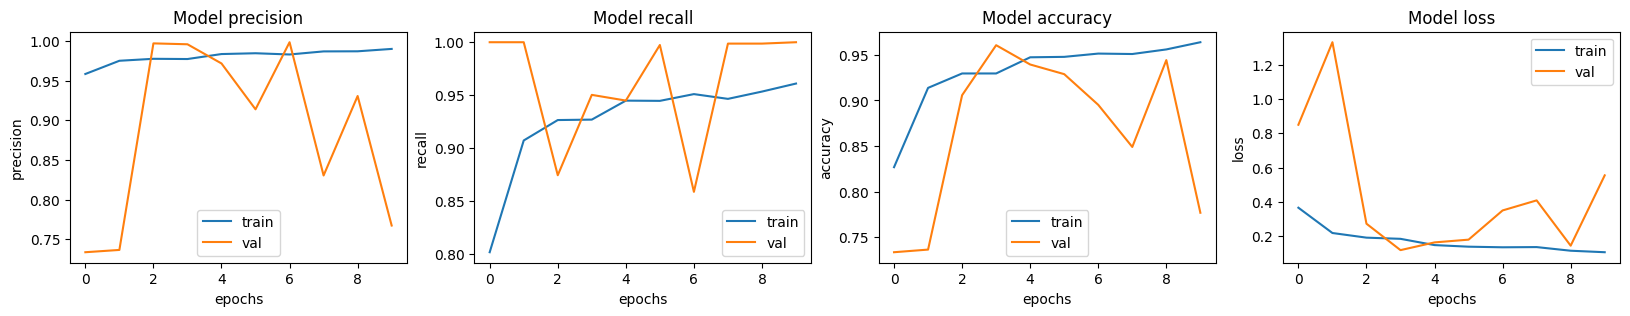

In [ ]:
fig, ax = plt.subplots(1, 4, figsize=(20, 3))
ax = ax.ravel()

for i, met in enumerate(['precision', 'recall', 'accuracy', 'loss']):
    ax[i].plot(history.history[met])
    ax[i].plot(history.history['val_' + met])
    ax[i].set_title('Model {}'.format(met))
    ax[i].set_xlabel('epochs')
    ax[i].set_ylabel(met)
    ax[i].legend(['train', 'val'])

loss, accuracy, precision, recall = model.evaluate(test_ds)

#7. 결과 확인

~~~

##조사내용

의료 데이터의 경우 구하기도 어렵고 구하더라도 데이터가 작은 경우가 많이 있습니다.

이런 문제를 해결하기 위해 Data augmentation 방법을 많이 시도합니다.
Data augmentation 은 각 데이터에 최적화된 방법을 찾기가 어렵고 제약사항이 많습니다. 그래서 의료분야에서는 기본적인 Data augmentation 방법들을 많이 사용합니다.

이미지 회전, 가우시안 노이즈 추가 방법 등을 많이 사용합니다. 특히 장기의 크기는 사람마다 거의 바뀌지 않습니다. 이런 특성을 이용한 방법이 노이즈 추가 방법입니다.

지금까지 설계한 위 X-RAY 사진 판독 폐렴 진단기의 정확도 = 약 80%

숙련된 의사 = 90% 이상

## => 개선이 필요하다!!

## Batch size, Epoch 변경

## augmentation 기법

#8. Batch size, Epoch 변경해보기

In [ ]:
# 프로젝트를 진행할 때 아래 두 변수를 변경해보세요
BATCH_SIZE = 64
EPOCHS = 15

train_filenames = tf.io.gfile.glob(TRAIN_PATH)
test_filenames = tf.io.gfile.glob(TEST_PATH)
val_filenames = tf.io.gfile.glob(VAL_PATH)

COUNT_NORMAL = len([filename for filename in train_filenames if "NORMAL" in filename])
COUNT_PNEUMONIA = len([filename for filename in train_filenames if "PNEUMONIA" in filename])
train_list_ds = tf.data.Dataset.from_tensor_slices(train_filenames)
val_list_ds = tf.data.Dataset.from_tensor_slices(val_filenames)
TRAIN_IMG_COUNT = tf.data.experimental.cardinality(train_list_ds).numpy()
VAL_IMG_COUNT = tf.data.experimental.cardinality(val_list_ds).numpy()

# 파일 경로의 끝에서 두번째 부분을 확인하면 양성과 음성을 구분할 수 있습니다
def get_label(file_path):
    parts = tf.strings.split(file_path, os.path.sep)
    return parts[-2] == "PNEUMONIA"   # 폐렴이면 양성(True), 노말이면 음성(False)

# 이미지를 알맞은 형식으로 바꿉니다.
def decode_img(img):
    img = tf.image.decode_jpeg(img, channels=3) # 이미지를 uint8 tensor로 수정
    img = tf.image.convert_image_dtype(img, tf.float32) # float32 타입으로 수정
    img = tf.image.resize(img, IMAGE_SIZE) # 이미지 사이즈를 IMAGE_SIZE로 수정
    return img

# 이미지 파일의 경로를 입력하면 이미지와 라벨을 읽어옵니다.
def process_path(file_path):
    label = get_label(file_path) # 라벨 검출
    img = tf.io.read_file(file_path) # 이미지 읽기
    img = decode_img(img) # 이미지를 알맞은 형식으로 수정

    # sample_weight 추가
    sample_weight = tf.cast(label, tf.float32) * tf.cast((weight_for_1 if label else weight_for_0), tf.float32)

    return img, label, sample_weight

train_ds = train_ds.repeat()
train_ds = train_list_ds.map(process_path).batch(BATCH_SIZE).prefetch(tf.data.experimental.AUTOTUNE)
val_ds = val_list_ds.map(process_path).batch(BATCH_SIZE).prefetch(tf.data.experimental.AUTOTUNE)

def conv_block(filters):
    block = tf.keras.Sequential([
        tf.keras.layers.SeparableConv2D(filters, 3, activation='relu', padding='same'),
        tf.keras.layers.SeparableConv2D(filters, 3, activation='relu', padding='same'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.MaxPool2D()
    ])

    return block

def dense_block(units, dropout_rate):
    block = tf.keras.Sequential([
        tf.keras.layers.Dense(units, activation='relu'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dropout(dropout_rate)
    ])

    return block

def build_model():
    model = tf.keras.Sequential([
        tf.keras.Input(shape=(IMAGE_SIZE[0], IMAGE_SIZE[1], 3)),

        tf.keras.layers.Conv2D(16, 3, activation='relu', padding='same'),
        tf.keras.layers.Conv2D(16, 3, activation='relu', padding='same'),
        tf.keras.layers.MaxPool2D(),

        conv_block(32),
        conv_block(64),

        conv_block(128),
        tf.keras.layers.Dropout(0.2),

        conv_block(256),
        tf.keras.layers.Dropout(0.2),

        tf.keras.layers.Flatten(),
        dense_block(512, 0.7),
        dense_block(128, 0.5),
        dense_block(64, 0.3),

        tf.keras.layers.Dense(1, activation='sigmoid')
    ])

    return model

weight_for_0 = (1 / COUNT_NORMAL)*(TRAIN_IMG_COUNT)/2.0
weight_for_1 = (1 / COUNT_PNEUMONIA)*(TRAIN_IMG_COUNT)/2.0

class_weight = {0: weight_for_0, 1: weight_for_1}

with tf.device('/GPU:0'):
    model = build_model()

    METRICS = [
        'accuracy',
        tf.keras.metrics.Precision(name='precision'),
        tf.keras.metrics.Recall(name='recall')
    ]

    model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=[
        'accuracy',
        tf.keras.metrics.Precision(name='precision'),
        tf.keras.metrics.Recall(name='recall')
    ]
    )

with tf.device('/GPU:0'):
    history = model.fit(
        train_ds,
        steps_per_epoch=TRAIN_IMG_COUNT // BATCH_SIZE,
        epochs=EPOCHS,
        validation_data=val_ds,
        validation_steps=VAL_IMG_COUNT // BATCH_SIZE,
    )


# 모델 훈련
# 훈련 시 steps_per_epoch 설정
history = model.fit(train_ds, epochs=15, validation_data=val_ds, steps_per_epoch=len(train_ds) // BATCH_SIZE)

# 훈련 과정 시각화
# 훈련 과정 시각화
fig, ax = plt.subplots(1, 4, figsize=(20, 3))
ax = ax.ravel()

for i, met in enumerate(['precision', 'recall', 'accuracy', 'loss']):
    ax[i].plot(history.history[met])
    if 'val_' + met in history.history:
        ax[i].plot(history.history['val_' + met])  # 검증 메트릭 존재시 plot
    ax[i].set_title('Model {}'.format(met))
    ax[i].set_xlabel('epochs')
    ax[i].set_ylabel(met)
    ax[i].legend(['train', 'val'])

# test_ds 정의
test_filenames = tf.io.gfile.glob(TEST_PATH)
test_list_ds = tf.data.Dataset.from_tensor_slices(test_filenames)

# 테스트 데이터셋에 대해 이미지 로딩 및 처리
test_ds = test_list_ds.map(process_path).batch(BATCH_SIZE).prefetch(tf.data.experimental.AUTOTUNE)

# 모델 평가
loss, accuracy, precision, recall = model.evaluate(test_ds)
print(f'Loss: {loss}, Accuracy: {accuracy}, Precision: {precision}, Recall: {recall}')

Epoch 1/15
 9/81 ━━━━━━━━━━━━━━━━━━━━ 10:00 8s/step - accuracy: 0.4964 - loss: 0.0000e+00 - precision: 0.0000e+00 - recall: 0.0000e+00

KeyboardInterrupt: 

#9. augmentation기법 사용하기

In [ ]:
# 데이터 증강 함수 정의
def augment(image, label, sample_weight):
    # 좌우 반전
    image = tf.image.random_flip_left_right(image)

    # 랜덤 회전 (0, 90, 180, 270도 회전)
    image = tf.image.rot90(image, k=tf.random.uniform(shape=(), minval=0, maxval=4, dtype=tf.int32))

    # 밝기 조정
    image = tf.image.random_brightness(image, max_delta=0.1)

    # 대비 조정
    image = tf.image.random_contrast(image, lower=0.8, upper=1.2)

    # 크기 조정 (이미지 크기를 [224, 224]로 고정)
    image = tf.image.resize(image, [224, 224])

    # 색상 변화
    image = tf.image.random_hue(image, max_delta=0.1)

    return image, label, sample_weight

def prepare_for_training(ds, shuffle_buffer_size=1000):
    # 증강을 적용한 배치 처리
    ds = ds.map(
            augment,       # augment 함수 적용
            num_parallel_calls=tf.data.experimental.AUTOTUNE
        )
    ds = ds.shuffle(buffer_size=shuffle_buffer_size)
    ds = ds.repeat()
    ds = ds.batch(BATCH_SIZE)
    ds = ds.prefetch(buffer_size=tf.data.experimental.AUTOTUNE)

    return ds

# 데이터셋 준비 (증강 적용)
train_ds = prepare_for_training(train_ds)
val_ds = prepare_for_training(val_ds)

# 모델 훈련
history = model.fit(
    train_ds,
    steps_per_epoch=TRAIN_IMG_COUNT // BATCH_SIZE,
    epochs=EPOCHS,
    validation_data=val_ds,
    validation_steps=VAL_IMG_COUNT // BATCH_SIZE,
    class_weight=class_weight,
)

# 모델 훈련 과정 시각화
fig, ax = plt.subplots(1, 4, figsize=(20, 3))
ax = ax.ravel()

for i, met in enumerate(['precision', 'recall', 'accuracy', 'loss']):
    ax[i].plot(history.history[met])
    if 'val_' + met in history.history:
        ax[i].plot(history.history['val_' + met])  # 검증 메트릭 존재시 plot
    ax[i].set_title('Model {}'.format(met))
    ax[i].set_xlabel('epochs')
    ax[i].set_ylabel(met)
    ax[i].legend(['train', 'val'])

# 테스트 데이터셋 정의 및 평가
test_filenames = tf.io.gfile.glob(TEST_PATH)
test_list_ds = tf.data.Dataset.from_tensor_slices(test_filenames)
test_ds = test_list_ds.map(process_path).batch(BATCH_SIZE).prefetch(tf.data.experimental.AUTOTUNE)

# 모델 평가
loss, accuracy, precision, recall = model.evaluate(test_ds)
print(f'Loss: {loss}, Accuracy: {accuracy}, Precision: {precision}, Recall: {recall}')

#10. ResNet-18 구현

## ResNet의 특징: Residual Connection으로 학습된 정보가 data 처리과정에서 손실되는 것을 방지함.

### 1. Residual block을 먼저 구성하기

<ResNet에서의 weight layer 구성>

3x3 CNN

BatchNormalization

활성화 함수 ReLU

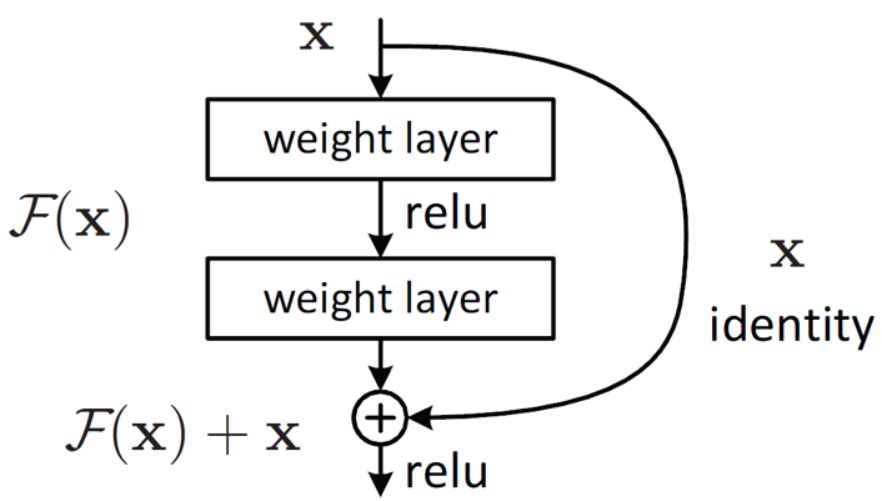

---

아래 table은 ImageNet Challenge를 가정했기 때문에

filter개수는 튜닝하면서 바꿔주기

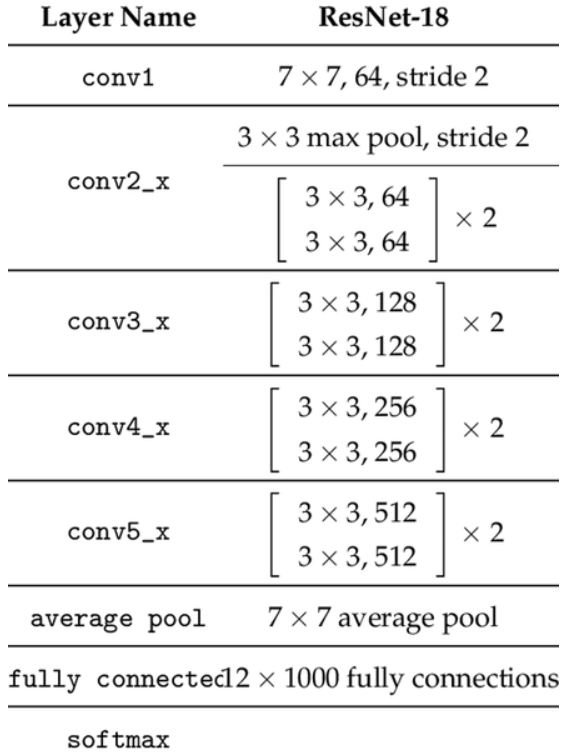

## 데이터 imbalance 처리

### class_weight 생략한다면 어떻게 될까?

### recall을 강조하기 위해 폐렴 data를 잘 맞추는 것을 더 강화하는 효과를 만들어낼 수는 없을까?

### optimizer나 learning rate 등의 변화도 고려해볼 법하다.


### accuracy와 recall 모두 고려하기 (의료 영상 모델의 특성상 recall도 중요)

In [ ]:
# 데이터 로드할 때 빠르게 로드할 수 있도록하는 설정 변수
AUTOTUNE = tf.data.experimental.AUTOTUNE
# X-RAY 이미지 사이즈 변수
IMAGE_SIZE = [224, 224]

# 프로젝트를 진행할 때 아래 두 변수를 변경해보세요
BATCH_SIZE = 16
EPOCHS = 10

train_filenames = tf.io.gfile.glob(TRAIN_PATH)
test_filenames = tf.io.gfile.glob(TEST_PATH)
val_filenames = tf.io.gfile.glob(VAL_PATH)

COUNT_NORMAL = len([filename for filename in train_filenames if "NORMAL" in filename])
COUNT_PNEUMONIA = len([filename for filename in train_filenames if "PNEUMONIA" in filename])
train_list_ds = tf.data.Dataset.from_tensor_slices(train_filenames)
val_list_ds = tf.data.Dataset.from_tensor_slices(val_filenames)
TRAIN_IMG_COUNT = tf.data.experimental.cardinality(train_list_ds).numpy()
VAL_IMG_COUNT = tf.data.experimental.cardinality(val_list_ds).numpy()

# 파일 경로의 끝에서 두번째 부분을 확인하면 양성과 음성을 구분할 수 있습니다
def get_label(file_path):
    parts = tf.strings.split(file_path, os.path.sep)
    return parts[-2] == "PNEUMONIA"   # 폐렴이면 양성(True), 노말이면 음성(False)

# 이미지를 알맞은 형식으로 바꿉니다.
def decode_img(img):
    img = tf.image.decode_jpeg(img, channels=3)  # 이미지를 uint8 tensor로 수정
    img = tf.image.convert_image_dtype(img, tf.float32)  # float32 타입으로 수정
    img = tf.image.resize(img, IMAGE_SIZE)  # 이미지 사이즈를 IMAGE_SIZE로 수정
    return img

# 이미지 파일의 경로를 입력하면 이미지와 라벨을 읽어옵니다.
def process_path(file_path):
    label = get_label(file_path)  # 라벨 검출
    img = tf.io.read_file(file_path)  # 이미지 읽기
    img = decode_img(img)  # 이미지를 알맞은 형식으로 수정

    # sample_weight 추가
    sample_weight = tf.cast(label, tf.float32) * tf.cast((weight_for_1 if label else weight_for_0), tf.float32)

    return img, label, sample_weight

train_ds = train_ds.repeat()
train_ds = train_list_ds.map(process_path).batch(BATCH_SIZE).prefetch(tf.data.experimental.AUTOTUNE)
val_ds = val_list_ds.map(process_path).batch(BATCH_SIZE).prefetch(tf.data.experimental.AUTOTUNE)

def conv_block(filters):
    block = tf.keras.Sequential([
        tf.keras.layers.SeparableConv2D(filters, 3, activation='relu', padding='same'),
        tf.keras.layers.SeparableConv2D(filters, 3, activation='relu', padding='same'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.MaxPool2D()
    ])

    return block

def dense_block(units, dropout_rate):
    block = tf.keras.Sequential([
        tf.keras.layers.Dense(units, activation='relu'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dropout(dropout_rate)
    ])

    return block

def build_model():
    model = tf.keras.Sequential([
        tf.keras.layers.InputLayer(input_shape=(224, 224, 3)),

        tf.keras.layers.Conv2D(16, 3, activation='relu', padding='same'),
        tf.keras.layers.Conv2D(16, 3, activation='relu', padding='same'),
        tf.keras.layers.MaxPool2D(),

        conv_block(32),
        conv_block(64),

        conv_block(128),
        tf.keras.layers.Dropout(0.2),

        conv_block(256),
        tf.keras.layers.Dropout(0.2),

        tf.keras.layers.Flatten(),
        dense_block(512, 0.7),
        dense_block(128, 0.5),
        dense_block(64, 0.3),

        tf.keras.layers.Dense(1, activation='sigmoid')
    ])

    return model

def preprocess_image(image):
    image = tf.image.resize(image, IMAGE_SIZE)  # 224x224로 리사이즈
    return image

weight_for_0 = (1 / COUNT_NORMAL)*(TRAIN_IMG_COUNT)/2.0
weight_for_1 = (1 / COUNT_PNEUMONIA)*(TRAIN_IMG_COUNT)/2.0

class_weight = {0: weight_for_0, 1: weight_for_1}

with tf.device('/GPU:0'):
    model = build_model()

    METRICS = [
        'accuracy',
        tf.keras.metrics.Precision(name='precision'),
        tf.keras.metrics.Recall(name='recall')
    ]

    model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=[
        'accuracy',
        tf.keras.metrics.Precision(name='precision'),
        tf.keras.metrics.Recall(name='recall')
    ]
    )

with tf.device('/GPU:0'):
    history = model.fit(
        train_ds,
        steps_per_epoch=TRAIN_IMG_COUNT // BATCH_SIZE,
        epochs=EPOCHS,
        validation_data=val_ds,
        validation_steps=VAL_IMG_COUNT // BATCH_SIZE,
        class_weight=class_weight,
    )

# 모델 훈련
# 훈련 시 steps_per_epoch 설정
history = model.fit(train_ds, epochs=15, validation_data=val_ds, steps_per_epoch=len(train_ds) // BATCH_SIZE)

# 훈련 과정 시각화
fig, ax = plt.subplots(1, 4, figsize=(20, 3))
ax = ax.ravel()

for i, met in enumerate(['precision', 'recall', 'accuracy', 'loss']):
    ax[i].plot(history.history[met])
    if 'val_' + met in history.history:
        ax[i].plot(history.history['val_' + met])  # 검증 메트릭 존재시 plot
    ax[i].set_title('Model {}'.format(met))
    ax[i].set_xlabel('epochs')
    ax[i].set_ylabel(met)
    ax[i].legend(['train', 'val'])

# test_ds 정의
test_filenames = tf.io.gfile.glob(TEST_PATH)
test_list_ds = tf.data.Dataset.from_tensor_slices(test_filenames)

# 테스트 데이터셋에 대해 이미지 로딩 및 처리
test_ds = test_list_ds.map(process_path).batch(BATCH_SIZE).prefetch(tf.data.experimental.AUTOTUNE)

# 모델 평가
loss, accuracy, precision, recall = model.evaluate(test_ds)
print(f'Loss: {loss}, Accuracy: {accuracy}, Precision: {precision}, Recall: {recall}')

#11. 데이터 imbalance 처리 (Step5)

#12. 모델 훈련 (Step6)

#13. 결과 확인과 시각화 (Step7)

#14. summary 및 회고